[[423.         283.         283.         ... 283.         283.
  283.        ]
 [423.         353.         283.         ... 283.         283.
  283.        ]
 [423.         353.         318.         ... 283.         283.
  283.        ]
 ...
 [423.         416.74137688 410.52193587 ... 290.24685003 289.99042826
  289.99042826]
 [423.         416.76096794 410.52193587 ... 290.24685003 290.11863914
  289.99042826]
 [423.         416.76096794 410.56075659 ... 290.37665846 290.11863914
  290.11863914]]


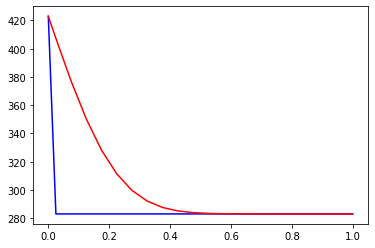

In [1]:
"""Temperature evolution in a rod, computed by explicit odespy solvers."""

from numpy import linspace, zeros, linspace, array
import matplotlib.pyplot as plt
import time
import numpy as np
import numpy.linalg as lin

def rhs(t, u):
    N = len(u) - 1
    rhs = zeros(N+1)
    rhs[0] = dsdt(t)
    for i in range(1, N):
        rhs[i] = (beta/dx**2)*(u[i+1] - 2*u[i] + u[i-1]) + \
                 f(x[i], t)
    rhs[N] = (beta/dx**2)*(2*u[i-1] + 2*dx*dudx(t) -
                           2*u[i]) + f(x[N], t)
    return rhs

def dudx(t):
    return 0

def s(t):
    return 423

def dsdt(t):
    return 0

def f(x, t):
    return 0

def K(t, u):
    #N = len(u) - 1
    N = 40
    K = zeros((N+1,N+1))
    K[0,0] = 0
    for i in range(1, N):
        K[i,i-1] = beta/dx**2
        K[i,i] = -2*beta/dx**2
        K[i,i+1] = beta/dx**2
    K[N,N-1] = (beta/dx**2)*2
    K[N,N] = (beta/dx**2)*(-2)
    return K

def K_vec(t, u):
    """Vectorized computation of K."""
    N = 40 
    K = zeros((N+1,N+1))
    K[0,0] = 0
    K[1:N-1] = beta/dx**2
    K[1:N] = -2*beta/dx**2
    K[2:N+1] = beta/dx**2
    K[N,N-1] = (beta/dx**2)*2
    K[N,N] = (beta/dx**2)*(-2)
    return K

L = 1
beta = 1
N = 40
x = linspace(0, L, N+1)
dx = x[1] - x[0]
u = zeros(N+1)
T=0.1
U_0 = zeros(N+1)
U_0[0] = s(0)
U_0[1:] = 283
dt = dx**2/(2*beta)
#dt *= 100
N_t = int(round(T/float(dt)))
t = linspace(0, T, N_t+1)

#jac = K(t,u)
#u1 = rhs(t,U_0)
#jac = lin.inv(jac)

#print (jac)
#print (U_0)

#function = np.dot(jac,u)
#print (function)

#print (update1)
#update1 = np.zeros(len(update))
#for n in range(len(update)-1):
  #  update1[n+1] = update1[n]-dt*update[n]
    
#print (update1)

def ode_BE(K, U_0, dt, T, N):
    N_t = int(round(float(T)/dt))
    u = zeros((N_t+1,N+1))
    t = linspace(0, N_t*dt, len(u))
    u[0,:] = U_0
    #u[1,:] = np.dot(K_vec(t,40),U_0)
    for n in range(N_t):
        jac = np.dot(K(t,40),u[n,:])
        u[n+1,:] = u[n,:] + dt*jac
        
    return u, t

jj, tt = ode_BE(K, U_0, dt, T, N)
print (jj)

plt.plot(x, U_0, 'b-')
plt.plot(x, jj[50], 'r-')
plt.show()